# La batalla del cifrado: ¿Lineal o polinomial? Descubre el método más rápido para proteger tus datos

# Instrucciones

1. Lea detenidamente el enunciado y las preguntas.
2. Escriba sus desarrollos a continuación de la celda que dice “Desarrollo”.
3. Se sugiere usar una celda de texto con el número de la pregunta, una o más celdas de código para el desarrollo y luego una celda de texto para escribir la respuesta.

# Enunciado

La empresa de Ciberseguridad Seguri-net está analizando dos métodos de encriptación para archivos desde $10$ MB hasta $80$ MB. En el primer método, por cada incremento de $2$ MB en el tamaño del archivo, el tiempo de encriptación se incrementa de manera constante en $0,8$ segundos, tal como muestra la tabla (Método A). Mientras que el segundo método (Método B) tiene un tiempo de encriptación, también en segundos, que varía de acuerdo a un modelo cuadrático.

#### Método A:
<center>

| Tamaño del archivo (MB) | Tiempo de encriptación (segundos) | 
|-------------------------|---------------------|
|$$10$$                  |$$7,4$$               |
|$$22$$                  |$$12,2$$              |
|$$40$$                  |$$19,4$$              |
|$$53$$                  |$$24,6$$              |
|$$76$$                  |$$33,8$$              |

</center>

#### Método B:


$$g(x)=0,01x^2-0,25x+10$$

Con ayuda de Python resuelve las siguientes preguntas, considera un decimal para responder:

1. ¿Qué tipo de función permite calcular el tiempo de encriptación si se usa el método A? Justifica tu respuesta. Además, determina la forma algebraica de la función que modela el tiempo de encriptación en función del tamaño del archivo en el método A. 
2. Calcula el tiempo de encriptación para ambos métodos cuando el tamaño del archivo es $27$ MB. ¿Cuál método empleó menos tiempo?
3. ¿Para qué tamaño(s) de archivo el tiempo de encriptación es el mismo en ambos métodos? ¿Cuál es el tiempo de encriptación?
4. En términos de tiempo, ¿para qué tamaño de archivos es más conveniente el método B?

# Desarrollo

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

### 1. ¿Qué tipo de función permite calcular el tiempo de encriptación si se usa el método A? Justifica tu respuesta. Además, determina la forma algebraica de la función que modela el tiempo de encriptación en función del tamaño del archivo en el método A.

La forma algebarica utilizada en esta función corresponde a una función lineal, ya que, su acenso es continuo con la misma repetición de datos y su pendiente es de 0.4 y su intercepto es de 3.4 quedando una función de 0.4x + 3.4

### 2. Calcula el tiempo de encriptación para ambos métodos cuando el tamaño del archivo es $27$ MB. ¿Cuál método empleó menos tiempo?

In [25]:
tamañoX = np.array([10,22,40,53,76])
tiempoY = np.array([7.4,12.2,19.4,24.6,33.8])
pendiente, intercepto = np.polyfit(tamañoX, tiempoY, 1)

def A(x):
    return pendiente * x + intercepto
def B(x):
    return 0.01 * x ** 2 - 0.25 * x + 10

print(A(27))
print(B(27))

14.20000000000001
10.54


Al calcular las funciones con la situación de 27MB, logramos dar con que el metodo B logro un mejor tiempo con 10.54 segundos en comparación con el metodo A que fue de 14.2 segundos

### 3. ¿Para qué tamaño(s) de archivo el tiempo de encriptación es el mismo en ambos métodos? ¿Cuál es el tiempo de encriptación?

In [26]:
x = np.linspace(10,80)
def igualar_funciones(x):
    return A(x) - B(x)
intercepcion = np.unique(np.round(fsolve(igualar_funciones,x),2))
print(intercepcion)
print(A(12.59))
print(A(52.41))

[12.59 52.41]
8.43600000000001
24.364000000000008


la primera vez que igualan en tiempo de encriptación en ambos metodos es en 12.59MB (X) y en un tiempo de 8.43 segundos(Y), mientras que la segunda vez que igualaron en tiempos de encriptación en ambos metodos es en 52.41 MB(X) y el tiempo fue de 24.36 segundos(Y).

### 4. En términos de tiempo, ¿para qué tamaño de archivos es más conveniente el método B?

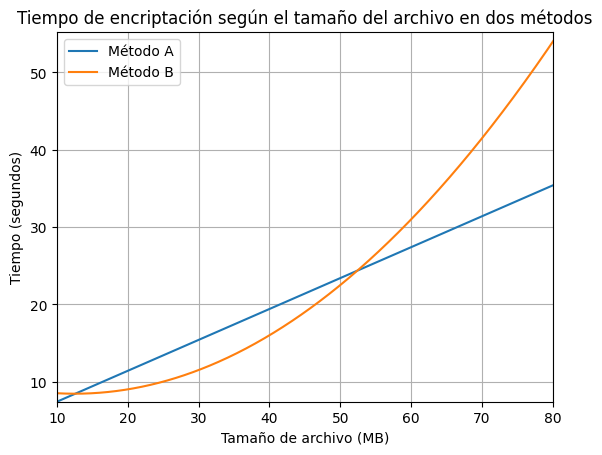

In [27]:
x = np.arange(10, 81, 0.1)
plt.plot(x, A(x), label = 'Método A')
plt.plot(x, B(x), label = 'Método B')
plt.axis([10,80,min(A(x)),max(B(x))])
plt.title('Tiempo de encriptación según el tamaño del archivo en dos métodos')
plt.ylabel('Tiempo (segundos)')
plt.xlabel('Tamaño de archivo (MB)')
plt.legend()
plt.grid(True)
plt.show()

El metodo B tiene una mejor respuesta en las intersecciones 12.59MB y 52.41MB, ya que,tiene un tiempo menor en comparación con el metodo A , que es mas eficiente en archivos mayores a 52.41MB.